<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_02/02_09_04_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.9.4. Ejemplo Círculo de mohr

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 15, 2022 | Conversión de código de MATLAB a Python|



In [1]:
import numpy as np              # Librería para cálculo algebráico.
import matplotlib.pyplot as plt # Librería para hacer gráficas.

El estado de esfuerzos es el siguiente:

In [2]:
# Se definen los esfuerzos [Pa].
sx  = -1 
sy  = 2
txy = -3    

# Se construye la matriz de tensiones (esfuerzos).
sigma = np.array([[sx, txy], 
                  [txy, sy]])
sigma

array([[-1, -3],
       [-3,  2]])

En códigos pasados calculamos el polinomio característico con la función ```sympy.charpoly()```, la cual nos arroja un resultado simbólico; al ser este un cálculo algebráico, usamos la función ```numpy.poly()``` la cual devuelve los coeficientes de dicho polinomio.

Para más detalles revisar la [documentación](https://numpy.org/doc/stable/reference/generated/numpy.poly.html).

A diferencia de MAXIMA, este arreglo inicia con elcoeficiente del termino con el máximo exponente, así: [$\sigma_n^2$, $\sigma_n$, 1] 

In [3]:
# Obtengo los coeficientes del polinomio característico:
polinomcar = np.poly(sigma)
polinomcar

array([  1.,  -1., -11.])

Es decir, el polinomio característico es de la forma $x^2 - x - 11$

Calculo la raices del polinomio característico, las cuales son la magnitud de los esfuerzos principales.

In [4]:
np.roots(polinomcar)

array([ 3.85410197, -2.85410197])

Verificamos estos resultados con los de MAXIMA

In [5]:
[-(3*np.sqrt(5)-1)/2, (3*np.sqrt(5)+1)/2 ]

[-2.8541019662496847, 3.8541019662496847]

Ahora calculamos los valores y vectores propios:

In [6]:
valp, vecp = np.linalg.eig(sigma)

In [7]:
valp

array([-2.85410197,  3.85410197])

Los vectores principales son las columnas de la matriz ```vecp```. Nótese que a diferencia de Matlab, Python lo calcula con el signo contrario, es decir, en el sentido opuesto. Igualmente ocurrió en un ejemplo anterior.

In [8]:
vecp

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

Se calcula el ángulo asociado al esfuerzo principal $\sigma_1$. Recuerde que la respuesta está dada en radiane.

$\theta_1=$

In [9]:
t1 = np.arctan2(2*txy, sx-sy)/2
t1

-1.0172219678978514

El vector unitario asocido al esfuerzo principal 1 es:

In [10]:
[np.cos(t1), np.sin(t1)]

[0.5257311121191336, -0.8506508083520399]

## Gráfico del círculo de mohr

Utilizando las funcinaliades de graficación de Python es posible dibujar el círculo de Mohr para este estado de esfuerzos. Para ellos, empleamos las funciones parametrizadas.

El círculo de mohr tiene dominio [0, 180°), esto lo calculo pero en radianes:

In [11]:
# Discretizo el dominio en 100 puntos.
tt = np.linspace(0, np.pi, 100)   

Realizo el cálculo de las ecuaciones (2.31) y (2.32). Como el dominio lo definí en un arreglo de numpy, simplemente evalúo las ecuaciones en el arreglo completo. 

In [12]:
ssn_t = ( sx+sy )/2 + ( sx-sy )/2*np.cos( 2*tt ) + txy*np.sin( 2*tt )
ttn_t = txy*np.cos( 2*tt ) - ( sx-sy )/2*np.sin( 2*tt ) 

Guardo en variables separadas los esfuerzos principales (las entradas del vector de valores principales)

In [13]:
s2, s1 = valp

Calculo el esfuerzo cortante máximo, como el radio de la circunferencia.

In [14]:
tmax_xy = np.sqrt( ((sx-sy)/2)**2 + txy**2 )
tmax_xy

3.3541019662496847

Ahora si, realizo el gráfico

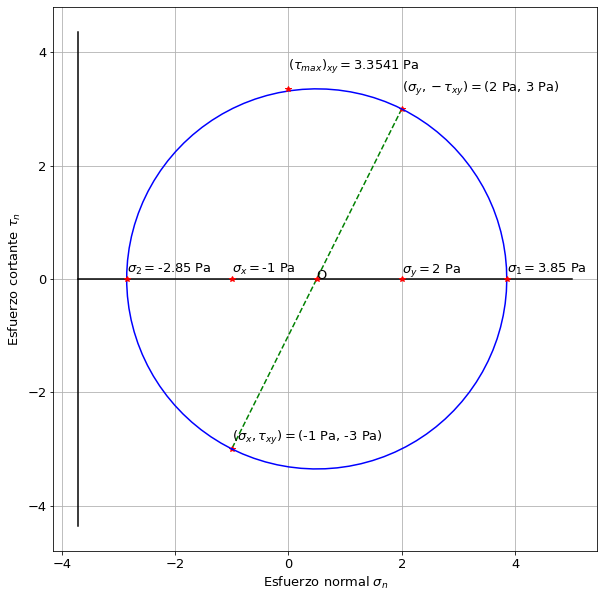

In [15]:
# Defino un tamaño de fuente para todo el gráfico.
plt.rcParams.update({'font.size': 13})

# Inicio el lienzo.
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

# Dibujo los ejes.
plt.plot((1.3*s2, 1.3*s1), (0, 0), "-k")
plt.plot((1.3*s2, 1.3*s2), (-1.3*tmax_xy, 1.3*tmax_xy), "-k")

# Dibujo la recta que pasa por los puntos C y A.
ax.plot((sy, sx), (-txy, txy), "--g")

ax.plot(sy, -txy, "*r")  # un 1% más abajo del punto.
ax.plot(sx, txy,  "*r")  # un 1% más arriba del punto.

ax.text(sy, -txy*1.1, r"$( \sigma_y, -\tau_{xy} )=$" + f"({sy} Pa, {-txy} Pa)")  
ax.text(sx, txy*0.95,  r"$( \sigma_x, \tau_{xy} )=$" + f"({sx} Pa, {txy} Pa)")  

# Marco el centro de la circunferencia O.
ax.plot((sx+sy)/2, 0, "*r")
ax.text((sx+sy)/2, 0,  "O")

# Dibujo la circunferencia.
ax.plot(ssn_t, ttn_t, "-b")

# Ubico los esfuerzos sx, sy 
ax.plot(sx, 0, "*r")
ax.text(sx, 0.1, r"$\sigma_x = $" + f"{sx} Pa")
ax.plot(sy, 0, "*r")
ax.text(sy, 0.1, r"$\sigma_y = $" + f"{sy} Pa")

# Ubico los esfuerzos principales s1, s2 
ax.plot(s1, 0, "*r")
ax.text(s1, 0.1, r"$\sigma_1 = $" + f"{round(s1, 2)} Pa")
ax.plot(s2, 0, "*r")
ax.text(s2, 0.1, r"$\sigma_2 = $" + f"{round(s2, 2)} Pa")

# Indico el esfuerzo cortante máximo.
ax.plot(0, tmax_xy, "*r")
ax.text(0, 1.1*tmax_xy, r"$(\tau_{max})_{xy} = $" + f"{round(tmax_xy, 4)} Pa")

# Nombre de los ejes.
ax.set_xlabel("Esfuerzo normal " + r"$\sigma_n$" )
ax.set_ylabel("Esfuerzo cortante " + r"$\tau_n$")

# Configuro parámetros del lienzo.
ax.grid(b=True, which='major', linestyle='-')
ax.set_aspect('equal', adjustable='box')
#plt.axis('off')

# Presento en pantalla el lienzo.
plt.show()